In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## Data

In [1]:
# import skfeature
import pandas as pd
import numpy as np
import math

## BER Graph

#### Examine 5 runs for dataset

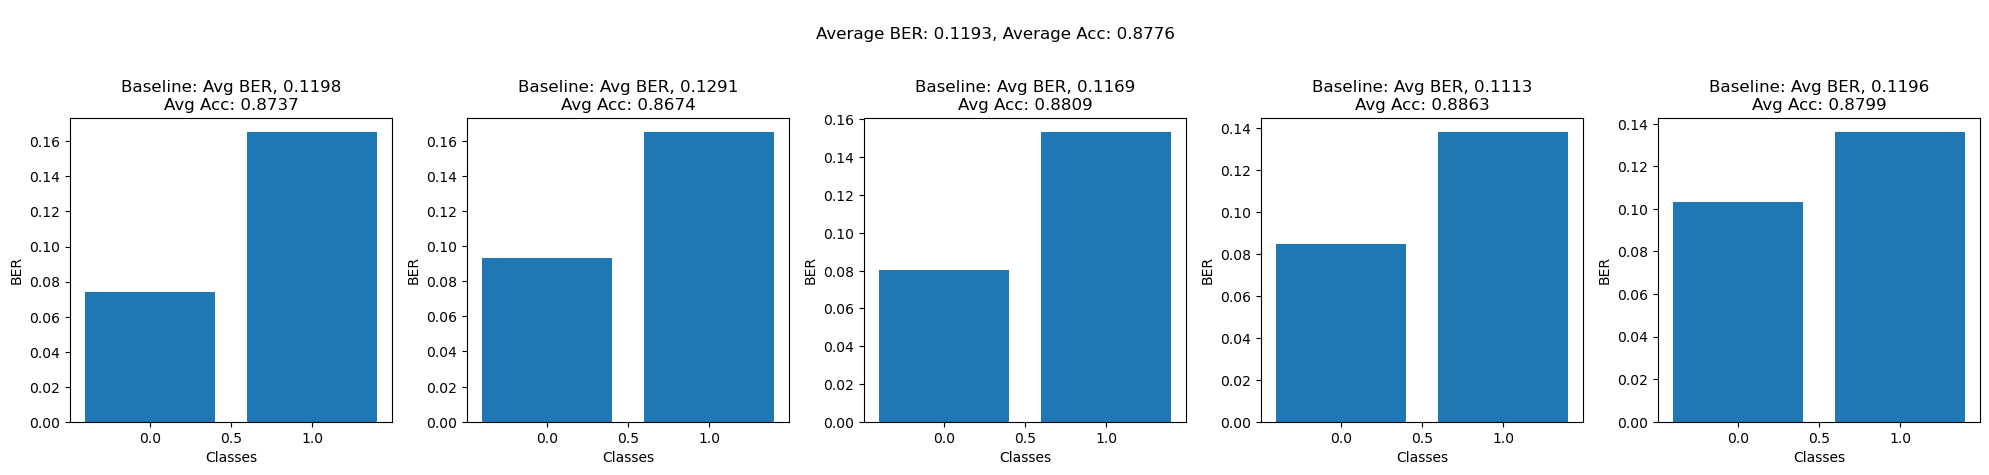

In [39]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(1,5)
i=0; j=0

folder_dict={"Baseline":"Baseline", "DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
model="Baseline"
epoch=100

# fig.set_figheight(5)
fig.set_figwidth(20)

avg_ber= []
avg_acc= []
for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{folder_dict[model]}/simul_study-{model}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{folder_dict[model]}/simul_study-{model}-v_dict-{epoch}.pkl", "rb") )
    axes[j].bar([i for i in range(len(ber))], ber)
    axes[j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['macro avg']['f1-score'],4)}")
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
    
    avg_ber.append(np.mean(ber))
    avg_acc.append(np.mean(dictionary['macro avg']['f1-score']))
plt.suptitle(f"\nAverage BER: {round(np.mean(avg_ber),4)}, Average Acc: {round(np.mean(avg_acc), 4)}\n" )

plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Baseline

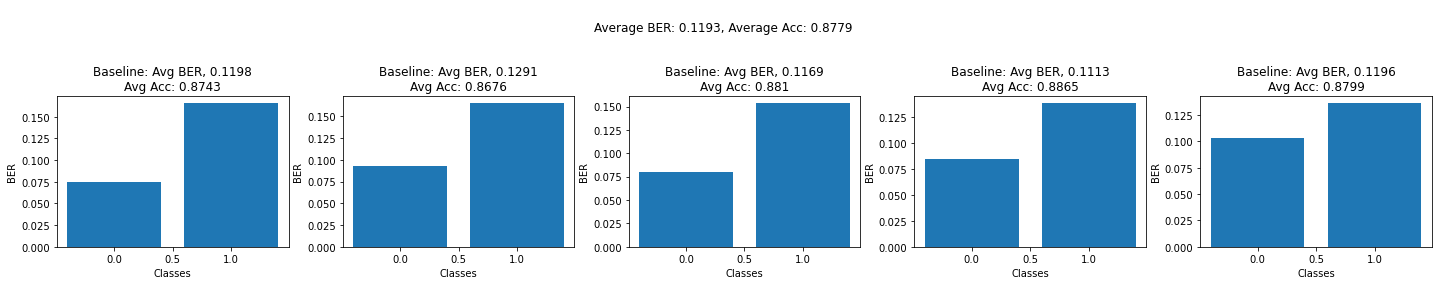

# DF

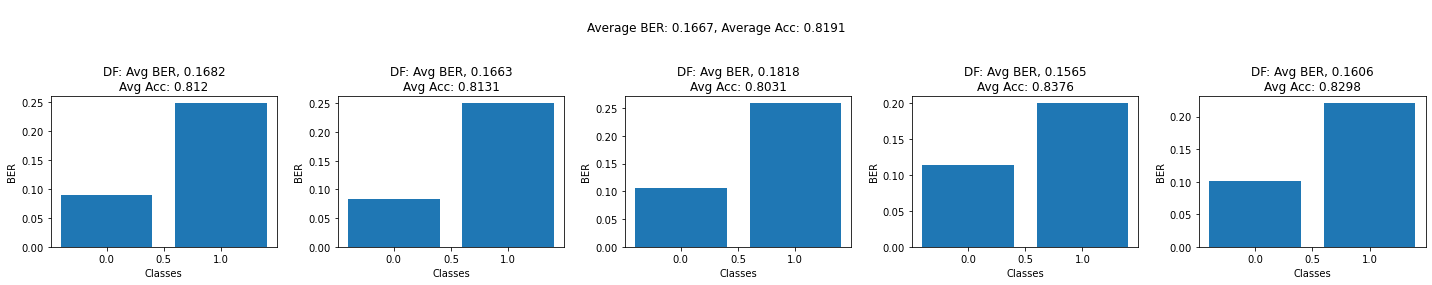

# NFS

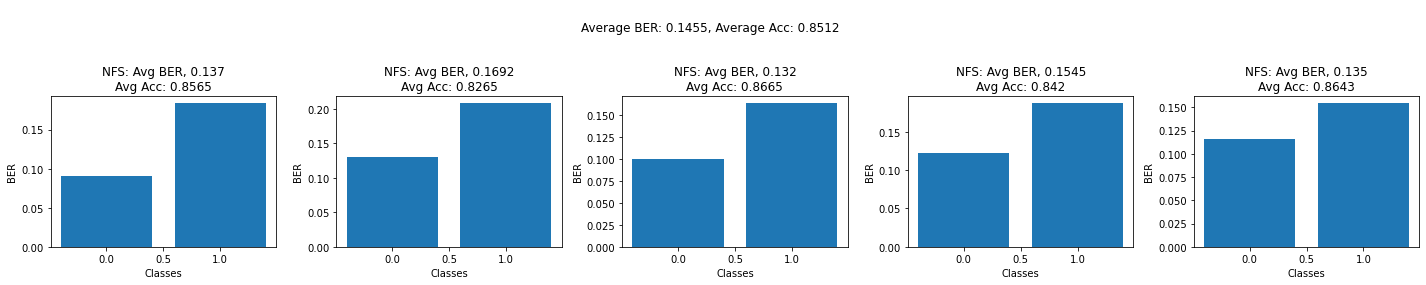

# Weight

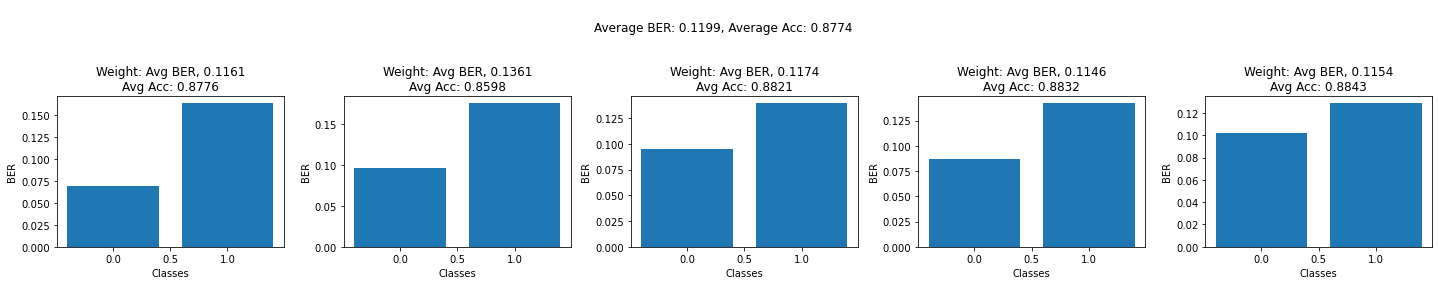

# Grad

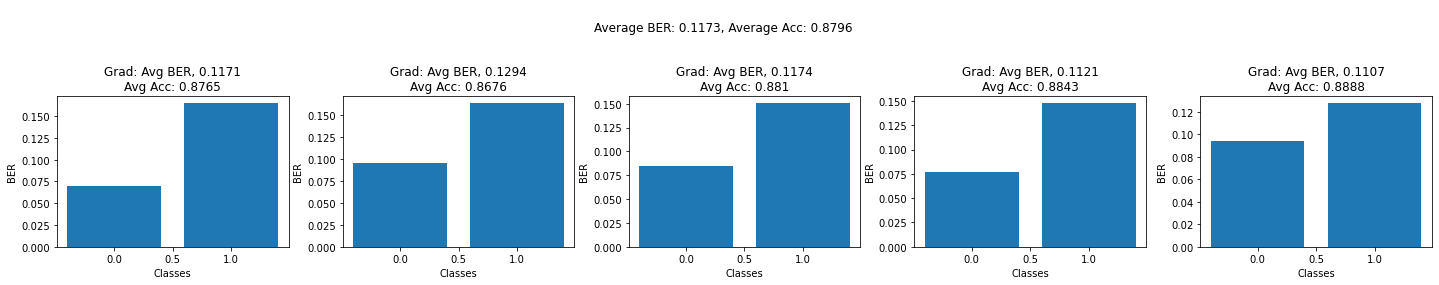

## save RS

In [78]:
# import pickle
# import os
# epoch=100

# for folder in range(5):
#     for percentile in range(10,100,10):
#         rs=[]
#         dictionaries=[]
#         for rs_folder in range(5):
#             ber= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/RS/RS{rs_folder}/simul_study-subset-RS{rs_folder}-{percentile}-ber-{epoch}.pkl", "rb"))
#             rs.append(ber)
            
#             dictionary= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/RS/RS{rs_folder}/simul_study-subset-RS{rs_folder}-{percentile}-v_dict-{epoch}.pkl", "rb")).copy()
#             dictionaries.append({"accuracy":dictionary["accuracy"], "macro avg":{"precision": dictionary["macro avg"]["precision"], "recall": dictionary["macro avg"]["recall"], "f1-score": dictionary["macro avg"]["f1-score"]}})        
#         if not os.path.exists(f"./experiments/simul_study/exp_log{folder}/RS/subset"):
#             os.mkdir(f"./experiments/simul_study/exp_log{folder}/RS/subset")
# #         pickle.dump(np.array(rs).mean(0), open(f"./experiments/simul_study/exp_log{folder}/RS/subset/simul_study-subset-RS-{percentile}-ber-{epoch}.pkl", "wb"))
#         dictionary= {"accuracy":np.mean([i['accuracy'] for i in dictionaries]), "macro avg":{"precision": np.mean([i['macro avg']['precision'] for i in dictionaries]), "recall":np.mean([i['macro avg']['recall'] for i in dictionaries]), "f1-score":np.mean([i['macro avg']['f1-score'] for i in dictionaries])} }
# #         pickle.dump(dictionary, open(f"./experiments/simul_study/exp_log{folder}/RS/subset/simul_study-subset-RS-{percentile}-v_dict-{epoch}.pkl", "wb"))    

#### RS: Reduce and Retrain

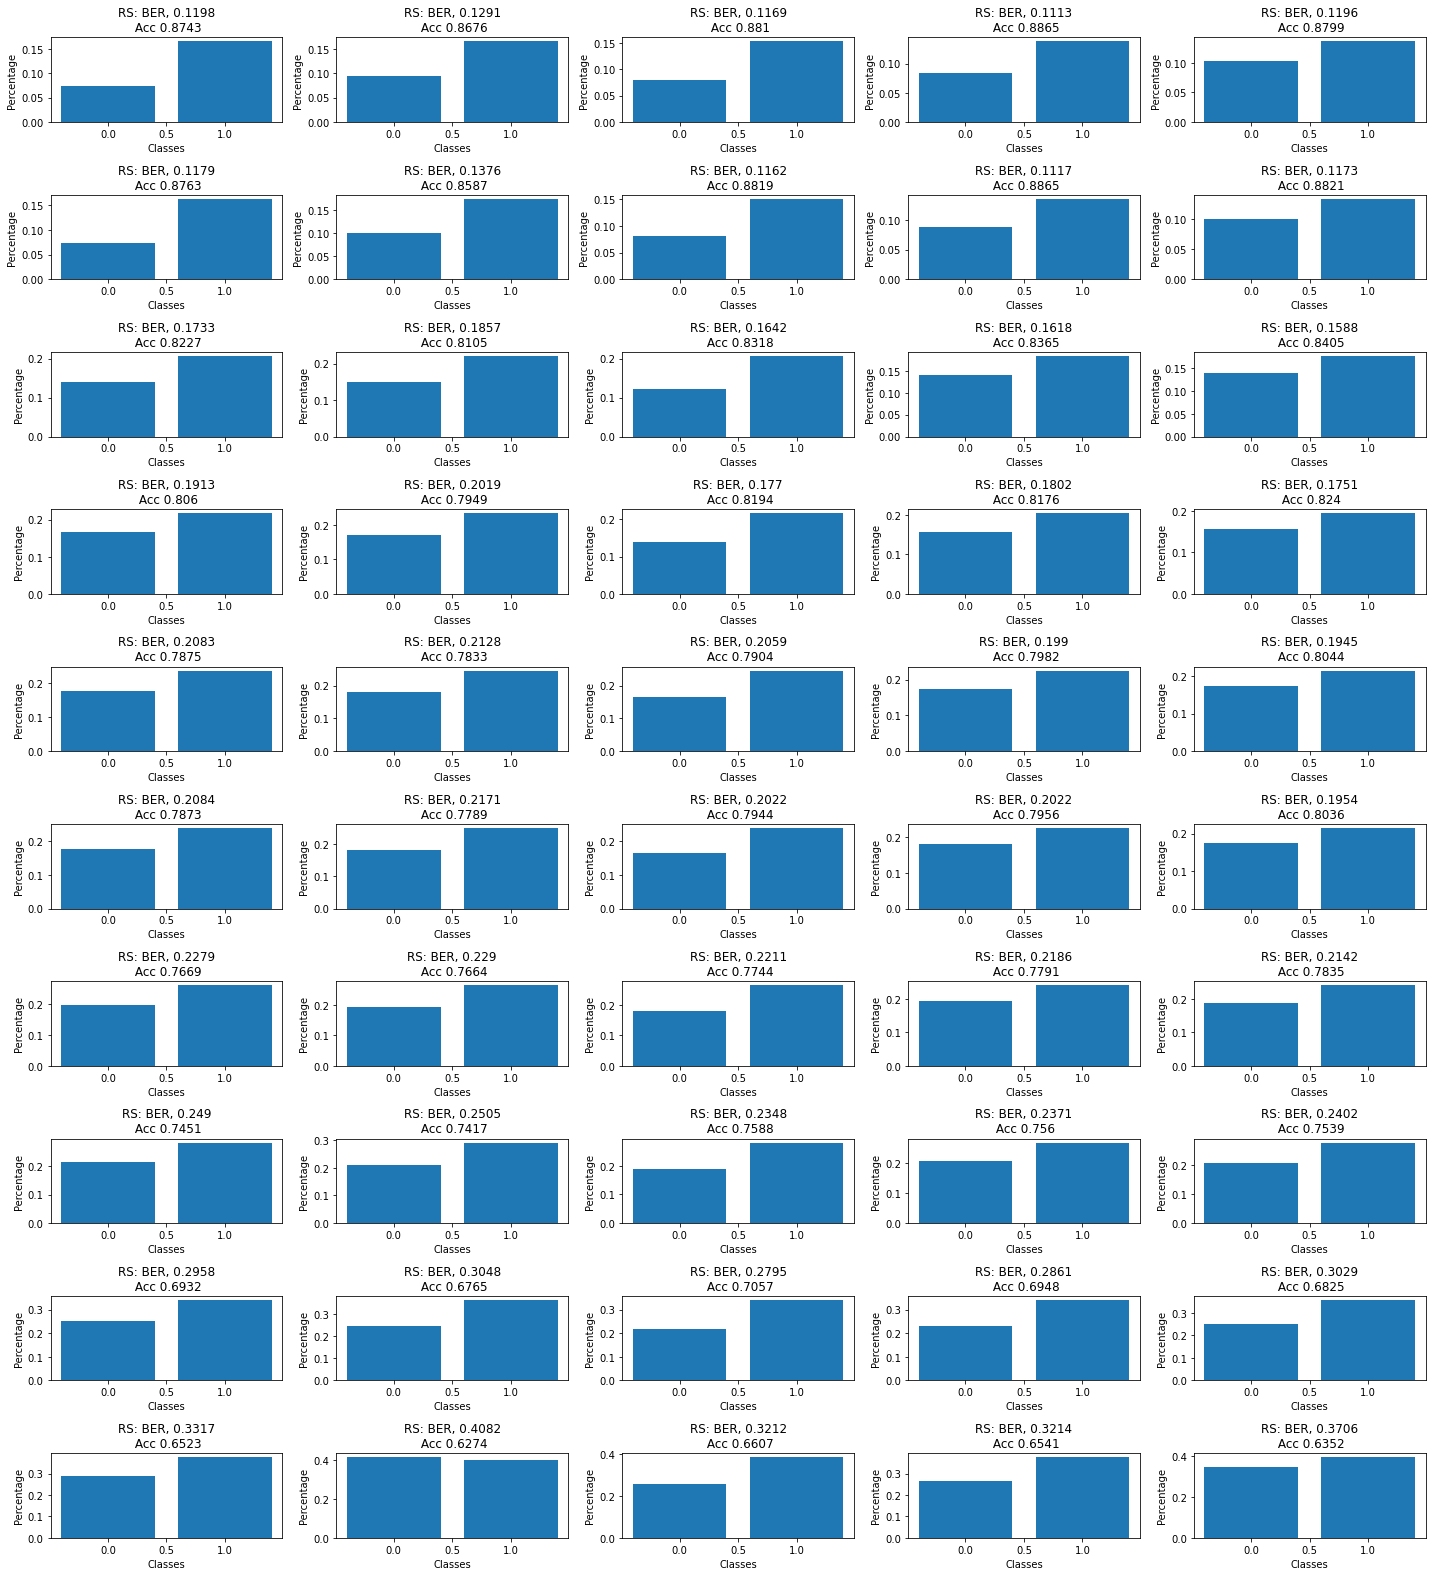

In [79]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight"} #folder: model
model="RS"
epoch=100

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    j += 1; i=1
    
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

#### Weight: Reduce and Retrain

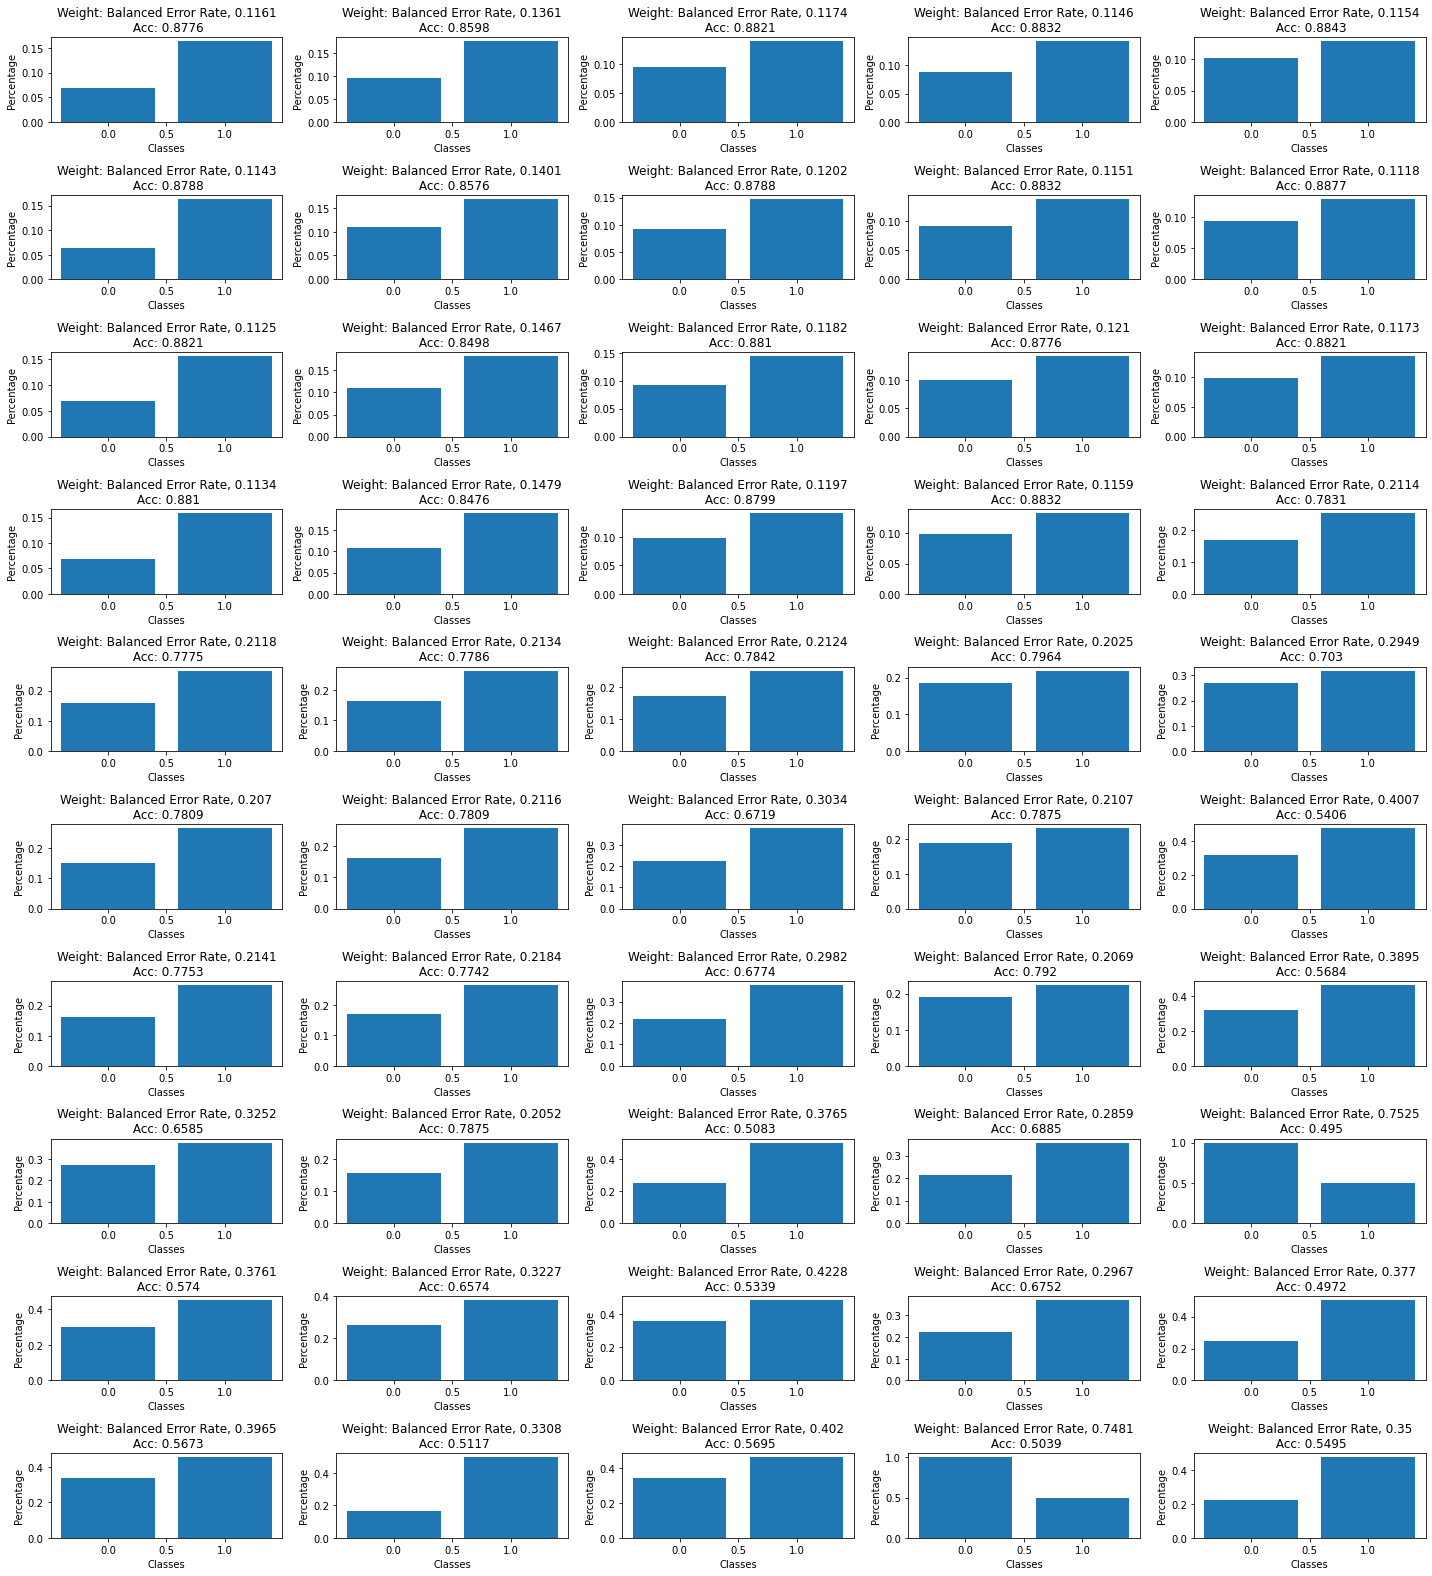

In [95]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight"} #folder: model
model="Weight"
epoch=100

weight_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        bers.append(round(np.mean(ber),4))
        
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    weight_ber.append(bers)
    j += 1; i=1
weight_ber=np.array(weight_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

#### DF: Reduce and Retrain

In [8]:
for folder in range(5):
    w= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/DF/simul_study-DF-w-100.pkl","rb"))
    print(np.percentile(w, [10,20,30,40,50,60,70,80,90]))

[-1.43573200e-04 -8.60067667e-05 -4.14118473e-05 -1.90053233e-06
  9.80598197e-05  2.94171920e-04  5.97263162e-04  9.68817947e-04
  8.06596060e-03]
[-1.37246956e-04 -3.41021370e-05  3.95044102e-05  7.35324706e-05
  2.31149665e-04  4.27120866e-04  9.21654868e-03  3.86450082e-02
  7.52132893e-02]
[-8.91343945e-05 -4.13674919e-05 -5.19385831e-06  6.37858146e-05
  1.90505372e-04  1.38402637e-02  3.45935579e-02  4.08220902e-02
  7.21377023e-02]
[-5.60125198e-05 -2.32673126e-05  5.23441158e-06  1.28290884e-04
  2.42101538e-04  3.81646387e-04  1.09388726e-02  3.69357787e-02
  4.52444412e-02]
[-1.27920088e-04 -5.54489598e-05 -3.84788258e-05  7.30047381e-05
  1.90511877e-04  2.49718374e-04  1.43919863e-02  4.76712719e-02
  5.71263067e-02]


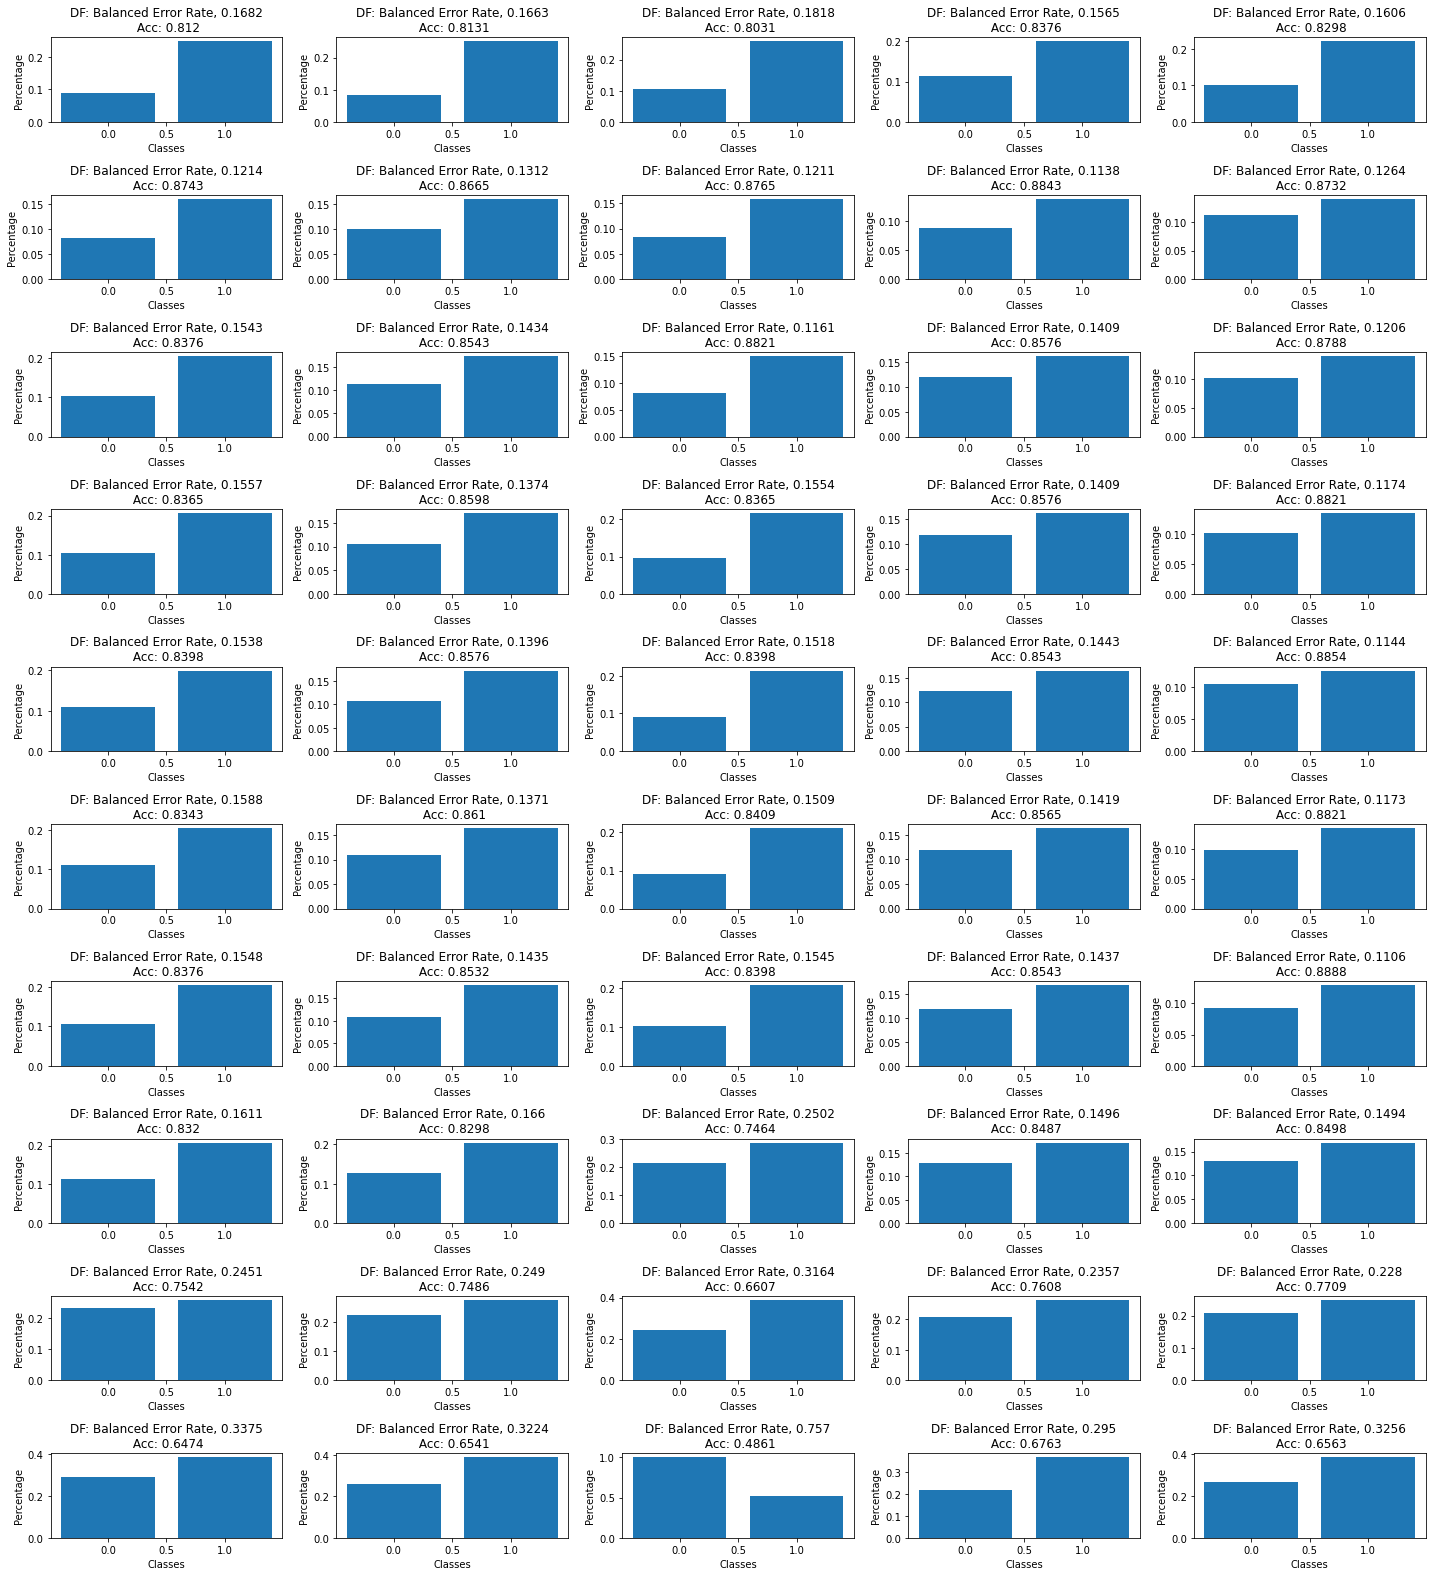

In [83]:
import matplotlib.pyplot as plt
import pickle
import numpy as np



fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight"} #folder: model
model="DF"
epoch=100
weight_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{model}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        bers.append(round(np.mean(ber),4))
        
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    weight_ber.append(bers)
    j += 1; i=1
weight_ber=np.array(weight_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

#### Grad: Visualisation

##### AUC

In [12]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary= []
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()
    

[('x12', 0.9999999551965857), ('x2', 0.9013135285602516), ('x13', 0.8816090647973738), ('x11', 0.5358799427195038), ('x1', 0.4376450422609537), ('x0', 0.37242692351139794), ('x10', 0.2889564029191689), ('x7', 0.02093476691917573), ('x8', 0.0070710539989242704), ('x9', -5.009175296777357e-10)]

[('x13', 0.999999916262027), ('x12', 0.6154238929627027), ('x2', 0.5096633910056596), ('x11', 0.3356787917910218), ('x0', 0.2861535645064279), ('x1', 0.2705042470454444), ('x10', 0.21994223355043374), ('x7', 0.010100722288710617), ('x9', 0.009573469999945905), ('x8', 8.974900822522613e-10)]

[('x12', 1.0000000048989932), ('x2', 0.7197129413359846), ('x0', 0.5339865645576367), ('x10', 0.4768276434617036), ('x1', 0.39069695285314765), ('x13', 0.24153594287235336), ('x11', 0.23852272862440316), ('x8', 0.010034134046917664), ('x9', 0.0018871223038638973), ('x7', -4.144911081027658e-10)]

[('x13', 0.9999999627348188), ('x12', 0.7865800189718186), ('x2', 0.6025403670775802), ('x0', 0.2817170435547638),

Text(96.0, 0.5, 'Runs')

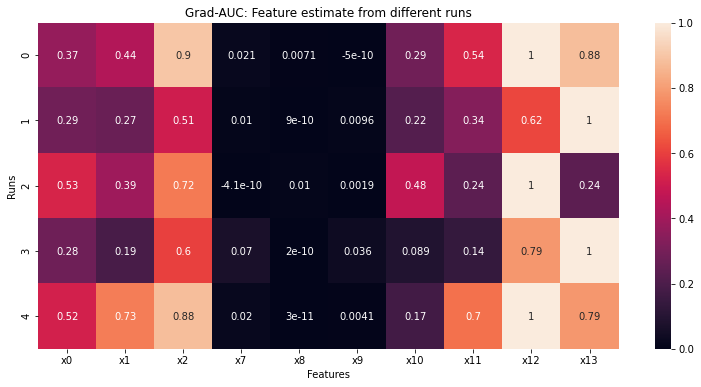

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Grad-AUC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

#### Partial: AUC

In [15]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary= []
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Partial/Grad/list/simul_study-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()
    

[('x12', 1.0000000272428977), ('x2', 0.9243108578012027), ('x13', 0.3256668406420804), ('x10', 0.26609925801445833), ('x0', 0.2562342412588503), ('x1', 0.23896028093432164), ('x11', 0.17122573504145588), ('x9', 0.03717841779957376), ('x8', 0.001546621978507634), ('x7', -4.262032393675952e-10)]

[('x13', 1.0000000422538733), ('x12', 0.5250362467281775), ('x2', 0.5026445258462218), ('x1', 0.38731597698750875), ('x11', 0.22872349858909047), ('x10', 0.17230954387949282), ('x0', 0.1275280067795279), ('x8', 0.009735729025358353), ('x9', 0.0040057101041721666), ('x7', -9.798517552894737e-11)]

[('x2', 0.999999963151609), ('x12', 0.8718019548641394), ('x11', 0.5385343200272743), ('x1', 0.4541972291822276), ('x0', 0.3395488012954573), ('x10', 0.22750756685062967), ('x13', 0.18754275594283598), ('x8', 0.05823749171201342), ('x9', 0.014725403769501044), ('x7', -1.9407864204623593e-11)]

[('x2', 0.9999999352718447), ('x12', 0.7748960047821924), ('x13', 0.7341697807824232), ('x10', 0.18927730886149

Text(96.0, 0.5, 'Runs')

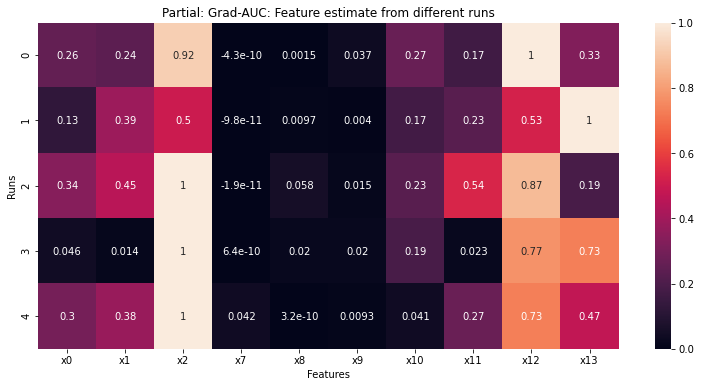

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Partial: Grad-AUC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

#### ROC

In [17]:
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Partial/Grad/list/simul_study-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[0.02563307 0.03597372 0.10891703 0.19151296 0.22969795 0.23723819
 0.24344251 0.39460175 0.9990281 ]
[0.01004973 0.01896998 0.13066558 0.18833129 0.23376523 0.27647845
 0.37967367 0.61294294 0.67960806]
[0.03196976 0.04167251 0.12183948 0.18724685 0.2471927  0.34873244
 0.44366255 0.52306941 0.84965347]
[0.01128099 0.02209683 0.02940156 0.03168086 0.08721895 0.18533764
 0.35514519 0.62847728 0.76121247]
[0.01673304 0.07071004 0.15326157 0.18337888 0.19261878 0.22028614
 0.28257241 0.43622879 0.75745598]


Text(96.0, 0.5, 'Runs')

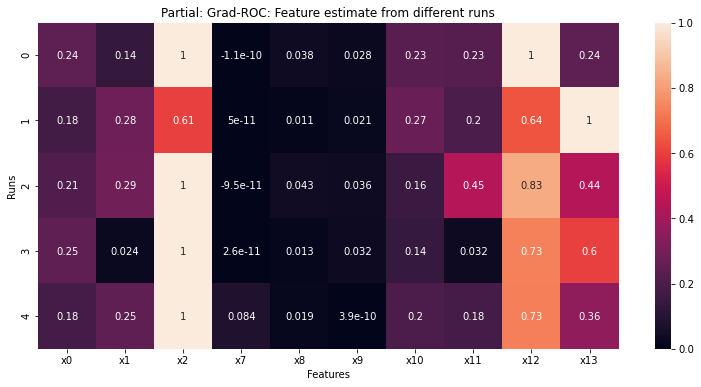

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Partial: Grad-ROC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

#### Partial: ROC

In [19]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()
    

[('x12', 1.0000000136816425), ('x2', 0.9981019774833726), ('x13', 0.6070354784115466), ('x11', 0.4044088597265727), ('x1', 0.3017130020206764), ('x0', 0.2427783860458277), ('x10', 0.16732336857788255), ('x8', 0.029869954248422204), ('x7', 0.009032303595493119), ('x9', 4.029079292422466e-10)]

[('x13', 1.0000000774606974), ('x12', 0.8999104376457581), ('x2', 0.6877411367962338), ('x11', 0.31913299028302333), ('x1', 0.2540602605099238), ('x0', 0.24938511942470143), ('x10', 0.24885464059052964), ('x7', 0.017521948867984527), ('x8', 0.0036521906742272847), ('x9', -1.2857706011004666e-09)]

[('x12', 1.0000000132727678), ('x2', 0.8209756395775685), ('x13', 0.6549777335625606), ('x0', 0.3918648634034412), ('x10', 0.34469730731242265), ('x1', 0.30644745724382716), ('x11', 0.18488199909052838), ('x9', 0.01298986435782723), ('x8', 0.006454325199839239), ('x7', -2.06007211289716e-10)]

[('x12', 1.0000000651691323), ('x13', 0.8619882608454219), ('x2', 0.6973384766195281), ('x0', 0.2883066258812974

Text(96.0, 0.5, 'Runs')

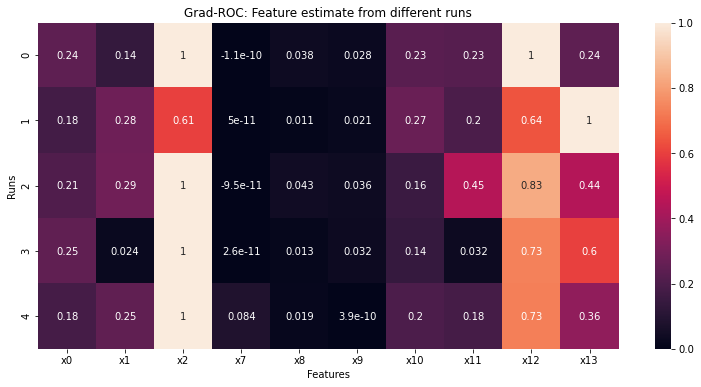

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Grad-ROC: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

#### STD

In [21]:
import numpy as np
from utilities.subset_func import return_epoch_stat, process_cov
import pickle

channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Partial/Grad/list/simul_study-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for i, j in zip(range(len(channels)), channels):
        dictionary[j]= np.trapz(epoch[:, i]) # AuC
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(np.array(list(dictionary.values())))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[0.00124616 0.03035314 0.10168209 0.20174461 0.29471744 0.34805076
 0.36454179 0.37956418 0.46751846]
[0.00176769 0.03837289 0.16455897 0.22619045 0.24418894 0.31852673
 0.4196258  0.43282976 0.49392664]
[0.00965966 0.01956093 0.05294267 0.20237801 0.29494965 0.30281598
 0.35072324 0.45357148 0.55178794]
[0.00910391 0.01746756 0.08331319 0.15819322 0.21227277 0.28958809
 0.37339994 0.38874773 0.49244111]
[0.01607854 0.04144977 0.19693239 0.32841681 0.38196429 0.39072563
 0.4010927  0.42810348 0.49710106]


Text(0.5, 33.0, 'Features')

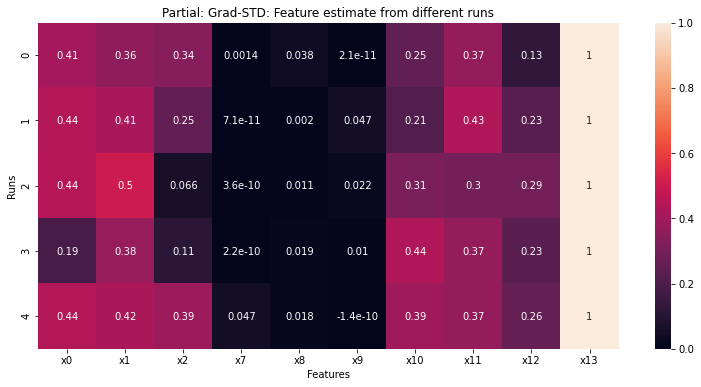

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Partial: Grad-STD: Feature estimate from different runs")
plt.ylabel("Runs")
plt.xlabel("Features")

#### Partial: STD

In [26]:
from utilities.subset_func import return_epoch_stat, process_cov
import pickle

channels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
channels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]

folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/Grad/list/simul_study-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for i, j in zip(range(len(channels)), channels):
        dictionary[j]= np.trapz(epoch[:, i]) # AuC
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(np.array(list(dictionary.values())))
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True))
    print()

[('x13', 0.9999999858616562), ('x11', 0.4820818977696568), ('x10', 0.3689792178830764), ('x0', 0.33696465940270315), ('x1', 0.29959650342541977), ('x2', 0.2547551984539016), ('x12', 0.1703418423630163), ('x8', 0.025442429391417276), ('x7', 0.022238451686414917), ('x9', -9.770984021884033e-11)]

[('x13', 0.9999999876837364), ('x11', 0.5646252314148654), ('x10', 0.3576649366564766), ('x0', 0.30730650605598697), ('x1', 0.24906812445775728), ('x12', 0.22052689094102362), ('x2', 0.18216785538902514), ('x9', 0.027162187682691297), ('x7', 0.00742890449456679), ('x8', 4.1057868216398674e-10)]

[('x13', 1.0000000802598379), ('x0', 0.5509535244638641), ('x1', 0.42060678016497377), ('x11', 0.39743479747031074), ('x10', 0.22855405819512953), ('x2', 0.21119590326520665), ('x12', 0.11514032283889719), ('x7', 0.010431710902242486), ('x9', 0.005648279247454369), ('x8', 4.113260843041644e-10)]

[('x13', 1.0000000174329813), ('x0', 0.4427414178640454), ('x2', 0.3871928381074454), ('x11', 0.3810249600195

Text(0.5, 33.0, 'Features')

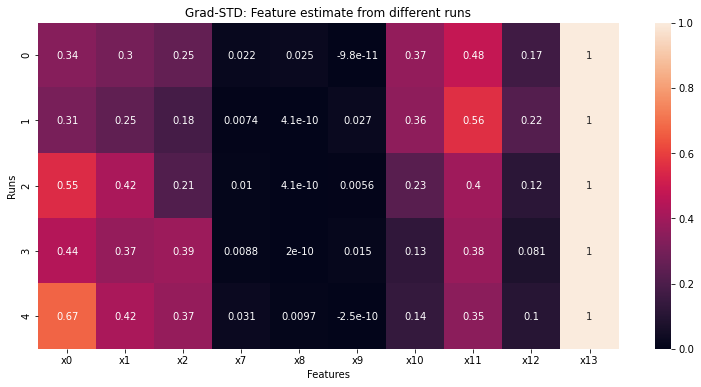

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(folder_dictionary), xticklabels=channels, annot=True)
plt.title("Grad-STD: Feature estimate from different runs")
plt.ylabel("Runs")
plt.xlabel("Features")

#### Grad: Reduce and Retrain

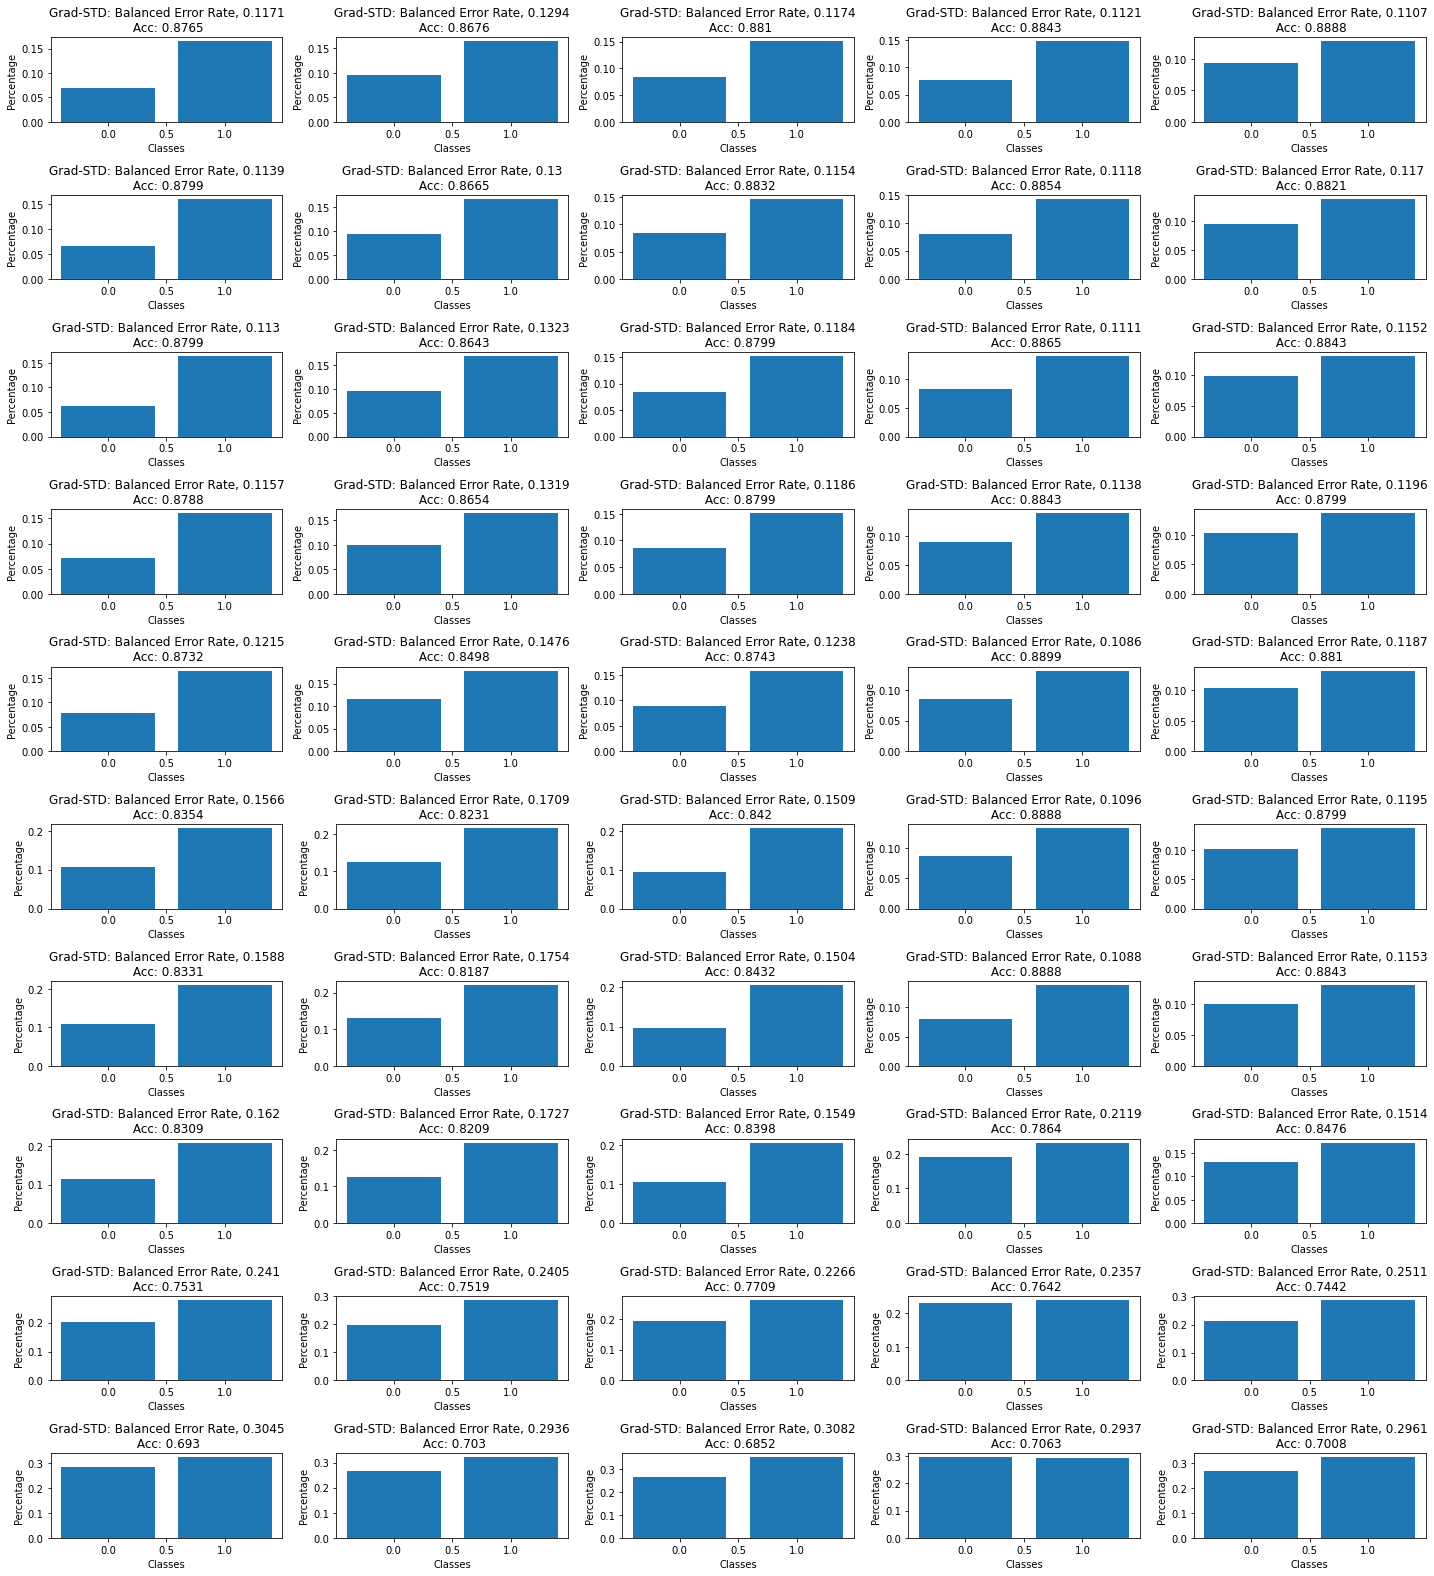

In [108]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "Grad-AUC":"Grad", "Grad-ROC":"Grad", "Grad-COV":"Grad", "Grad-STD":"Grad"} #folder: model
model="Grad-STD"
epoch=100
weight_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)

for folder in range(5):
    ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )

    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

i=1; j=0
for folder in range(5):
    bers=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/subset/simul_study-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/subset/simul_study-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        bers.append(round(np.mean(ber),4))
        
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: Balanced Error Rate, {round(np.mean(ber),4)}\n Acc: {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
    weight_ber.append(bers)
    j += 1; i=1
weight_ber=np.array(weight_ber)
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

#### Heatmap Visualisation

In [29]:
import pickle
ws=[]
# original_dict={"Grad-sum":"Grad", "Grad-std":"Grad"} #folder: model
# model="Grad-sum"

original_dict={"DF":"DF", "RS":"RS", "Fisher":"Baseline", "FScore":"Baseline", "NFS":"NFS",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="DF"

epoch=100
for folder in range(5):
    scaler=MinMaxScaler()
    w= pickle.load( open(f"./experiments/simul_study/exp_log{folder}/{original_dict[model]}/simul_study-{model}-w-{epoch}.pkl", "rb") )
    print(w)
    w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
    ws.append(w) #(abs(w))
        #         bers.append(ber)
#     print("percentile "+str(percentile),round(np.mean(bers), 4))


[ 7.6732218e-02  1.0022003e-01 -3.2966910e-04  1.7897553e-06
 -2.6196483e-05 -1.6347550e-04  3.4233020e-04  6.4956583e-04
 -5.6079071e-04  4.8447866e-02]
[ 5.5118274e-02  8.6661100e-02  3.5413425e-02 -4.0140330e-05
  9.8024619e-05 -8.4850100e-05  9.4429241e-05  4.8429015e-04
  5.2283960e-04  5.0402112e-02]
[-9.9290148e-05  8.4249645e-02 -2.7273785e-04  9.4222414e-05
  2.9349202e-04  9.4867401e-02  3.4721501e-02  6.7892554e-04
  8.1182930e-05  5.1539958e-02]
[ 1.4079309e-01  4.8453963e-04 -3.7330014e-04 -1.4248182e-04
  1.6360203e-04  7.8086254e-05  4.4208227e-04  1.1592461e-01
 -5.3875480e-04  1.1355335e-01]
[ 3.2495303e-05  8.4566837e-04  1.3722358e-03 -1.3359165e-04
 -1.5084558e-05  4.3573676e-04  1.3595916e-01  5.6702226e-02
 -2.4511109e-04  4.1650169e-02]


Text(96.0, 0.5, 'Runs')

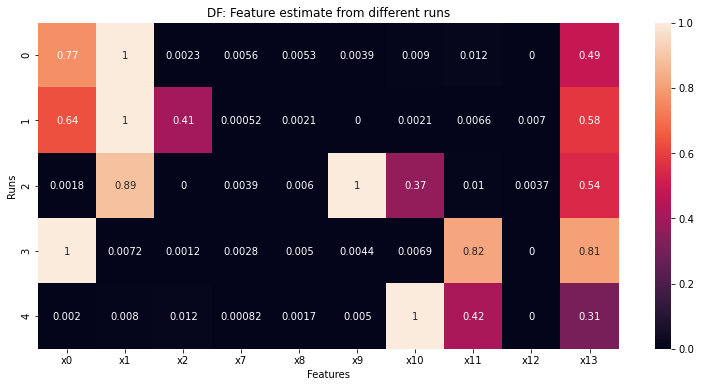

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=["useful0", "useful1", "useful2", "useless7","useless8", "useless9","secondary10","secondary11", "secondary12", "secodnary13"]
x_labels=["x0", "x1", "x2", "x7","x8", "x9","x10","x11", "x12", "x13"]
plt.figure(figsize=(13,6))
sns.heatmap(pd.DataFrame(ws), xticklabels=x_labels, annot=True)
plt.title(f"{model}: Feature estimate from different runs")
plt.xlabel("Features")
plt.ylabel("Runs")

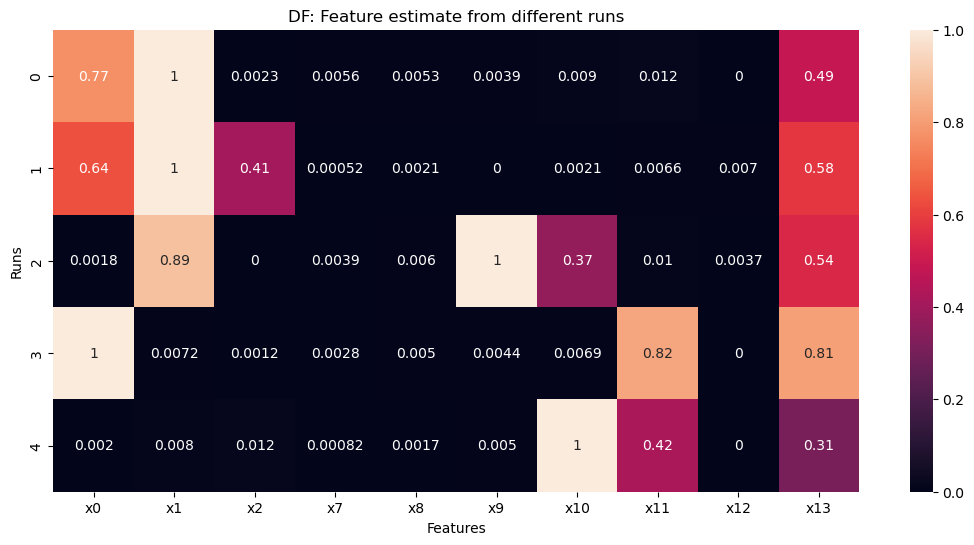

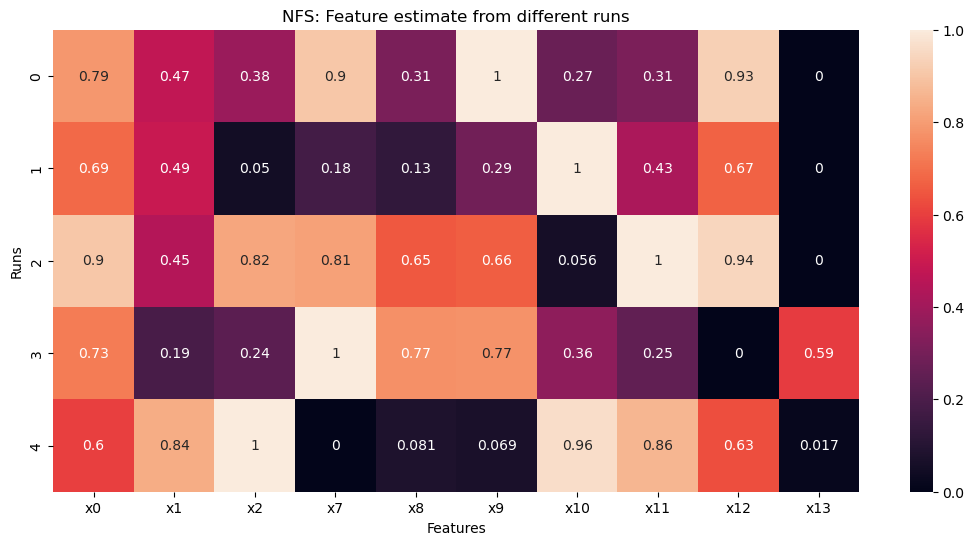

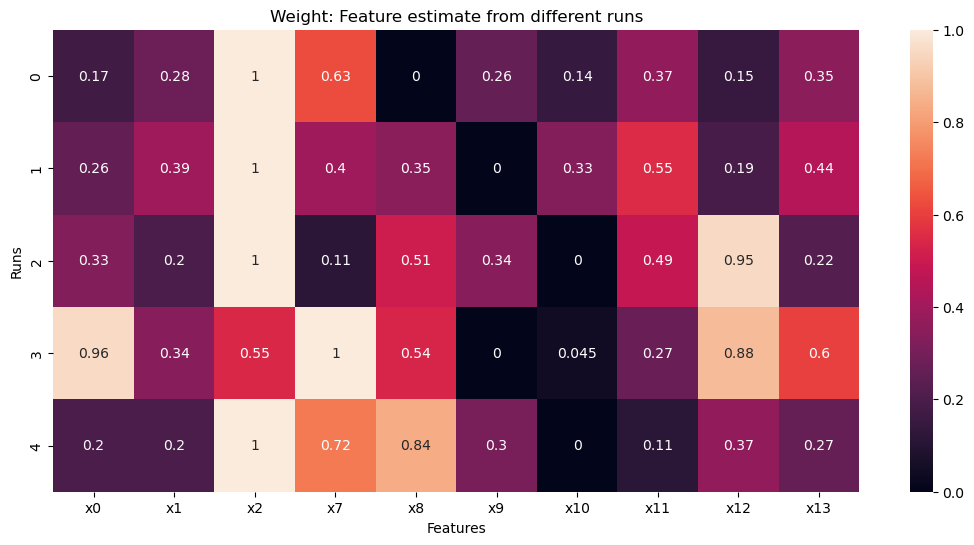

## Subset

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
complete_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [3]:
name_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight-Naive"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [73]:
existing_methods= [("Fisher","Fisher"), ("FScore", "FScore"),("RS", "RS"),("DF","DF")]

In [474]:
simul_comparison= [("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight"), ("RS", "RS"),("DF","DF")]

In [169]:
grad_comparison= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("RS", "RS"),("DF","DF")]

In [80]:
developing_methods= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight")]

In [3]:
import seaborn as sns
# palette= sns.color_palette(as_cmap=True)
rocket_palette= sns.color_palette("rocket",as_cmap=True)
viridisr_palette= sns.color_palette("viridis_r",as_cmap=True)
viridis_palette= sns.color_palette("viridis",as_cmap=True)
colour={}
# for i, j in zip(range(len(complete_set)), [z[1] for z in complete_set]):
#     colour[j]= i

colour["RS"]= rocket_palette.colors[100]

for i, j in zip(['Fisher', 'FScore'], [rocket_palette.colors[160], rocket_palette.colors[210]]):
    colour[i]= j
    
for i, j in zip(["DF", "NFS", "Weight"], [viridisr_palette.colors[190], viridisr_palette.colors[215], viridisr_palette.colors[250]]):
    colour[i]= j
    
for i, j in zip(["Grad-AUC", "Grad-ROC", "Grad-STD"], [viridis_palette.colors[140], viridis_palette.colors[190], viridis_palette.colors[220]]):
    colour[i]=j
colour

{'RS': [0.61792306, 0.10325288, 0.35760108],
 'Fisher': [0.92676657, 0.29823282, 0.24285536],
 'FScore': [0.96403203, 0.65122535, 0.4932578],
 'DF': [0.227802, 0.326594, 0.546532],
 'NFS': [0.270595, 0.214069, 0.507052],
 'Weight': [0.273809, 0.031497, 0.358853],
 'Grad-AUC': [0.119423, 0.611141, 0.538982],
 'Grad-ROC': [0.35236, 0.783011, 0.392636],
 'Grad-STD': [0.636902, 0.856542, 0.21662]}

In [4]:
ber_dictionary={}
cr_dictionary={}
for_range= range(90,-10,-10)
# model_list= existing_methods+[("Simul", "Simul"), ("ThresholdedSimul", "ThresholdedSimul")] # simul
# model_list= developing_methods #s+[("RS", "RS"), ("DF", "DF")]
# model_list=[("Grad","Grad-sum"), ("Grad", "Grad-std"), ("DF", "DF")] # grad
# model_list= grad_comparison+[("Simul", "Simul"), ("Fisher","Fisher"), ("FScore", "FScore")] # outlier
# model_list= developing_methods+[("Fisher","Fisher"), ("FScore", "FScore")]
epoch=100
model_list= complete_set
for model_dir, model in model_list:
    ber={}
    dictionary={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        dictionary[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model_dir}/subset/simul_study-subset-{model}-{percentage}-ber-{epoch}.pkl", "rb")) ) )
            tmp= pickle.load(open(f"./experiments/simul_study/exp_log{folder}/{model_dir}/subset/simul_study-subset-{model}-{percentage}-v_dict-{epoch}.pkl", "rb") )
            dictionary[folder].append( tmp  )
    ber_dictionary[model]= ber
    cr_dictionary[model]= dictionary
    
ber_dictionary_average_plt={}
ber_dictionary_average_sns={}
cr_dictionary_average_plt={}
cr_dictionary_average_sns={}
for i in ber_dictionary.keys():
    average=[]
    metrics_report=[]
    for j in ber_dictionary[i].keys():
        average.append(ber_dictionary[i][j])
        metrics_report.append( [ z["macro avg"]["f1-score"] for z in cr_dictionary[i][j] ] )
#     print(average)
    ber_dictionary_average_sns[i]= average#np.array(average).mean(axis=0)
    ber_dictionary_average_plt[i]= np.array(average).mean(axis=0)    
    cr_dictionary_average_sns[i]= metrics_report
    cr_dictionary_average_plt[i]= np.array(metrics_report).mean(axis=0)

In [1]:
# T Tests

# from scipy.stats import ttest_ind

# total_pval=[]
# total_tstats=[]
# for percentage_idx in [0,1,2,3,4,5,6,7,8,9]:

#     pval=[]
#     tstats=[]
#     for key in ["Grad-ROC"]:
#         v= np.array(ber_dictionary_average_sns[key])[:,percentage_idx]
#         rs_v= np.array(ber_dictionary_average_sns['RS'])[:, percentage_idx]
        
#         print(rs_v, v)
        
#         if 0.5< np.std(rs_v)/ np.std(v) < 2:
#             print("similar variance")
#             res= ttest_ind(v, rs_v)
#             print(f"{key}: {for_range[percentage_idx]}, {res}")
#             print()

        
#         if np.std(rs_v) > 2*np.std(v) or np.std(v) > 2*np.std(rs_v):
#             print("unqeual variance")
#             res= ttest_ind(v, rs_v, equal_var=False)
#             print(f"{key}: {for_range[percentage_idx]}, {res}")
#             print()
        
#         pval.append(res.pvalue)
#         tstats.append(res.statistic)
        
#     total_pval.append(pval)
#     total_tstats.append(tstats)
#     print(for_range[percentage_idx], np.array(tstats).mean(), np.array(pval).mean())
#     print()
    
# print(np.array(total_tstats).mean(), np.array(total_pval).mean())
        

In [2]:
## T Tests
# from scipy.stats import ttest_ind

# total_pval=[]
# total_tstats=[]
# for percentage_idx in [0,1,2,3,4,5,6,7,8,9]:

#     pval=[]
#     tstats=[]
#     for key in ["Grad-AUC"]:
#         v= np.array(ber_dictionary_average_sns[key])[:,percentage_idx]
#         rs_v= np.array(ber_dictionary_average_sns['RS'])[:, percentage_idx]
        
#         print(rs_v, v)
        
#         if 0.5< np.std(rs_v)/ np.std(v) < 2:
#             print("similar variance")
#             res= ttest_ind(v, rs_v)
#             print(f"{key}: {for_range[percentage_idx]}, {res}")
#             print()

        
#         if np.std(rs_v) > 2*np.std(v) or np.std(v) > 2*np.std(rs_v):
#             print("unqeual variance")
#             res= ttest_ind(v, rs_v, equal_var=False)
#             print(f"{key}: {for_range[percentage_idx]}, {res}")
#             print()
        
#         pval.append(res.pvalue)
#         tstats.append(res.statistic)
        
#     total_pval.append(pval)
#     total_tstats.append(tstats)
#     print(for_range[percentage_idx], np.array(tstats).mean(), np.array(pval).mean())
#     print()
    
# print(np.array(total_tstats).mean(), np.array(total_pval).mean())
        

In [3]:
# for i in ber_dictionary_average_plt.keys():
#     print(i)
#     for j in np.flip(ber_dictionary_average_plt[i]):
#         print(round(j,4), end="")
#         print(" & ", end="")
# #     print(i, np.flip(ber_dictionary_average_plt[i]) ) 
#     print(); print()

In [10]:
print("AUC") # larger it is, worse it is
for i in ber_dictionary_average_plt.keys():
#     print()
#     for j in np.flip(cr_dictionary_average_plt[i])[1:]:
#         print(round(j, 4), end="")
#         print(" & ", end="")
    print(i, round(np.trapz(np.flip(ber_dictionary_average_plt[i])[1:]),4) ) 
    print(); print()

AUC
RS 1.7567


Fisher 1.396


FScore 1.3935


DF 1.395


NFS 2.2549


Weight 2.0548


Grad-AUC 1.6333


Grad-ROC 1.6347


Grad-STD 1.2632




In [4]:
# for i in cr_dictionary_average_plt.keys():
#     print(i)
#     for j in np.flip(cr_dictionary_average_plt[i]):
#         print(round(j,4), end="")
#         print(" & ", end="")
# #     print(i, np.flip(ber_dictionary_average_plt[i]) ) 
#     print(); print()

Text(0.5, 0.98, 'simul_study: Reduce and Retrain')

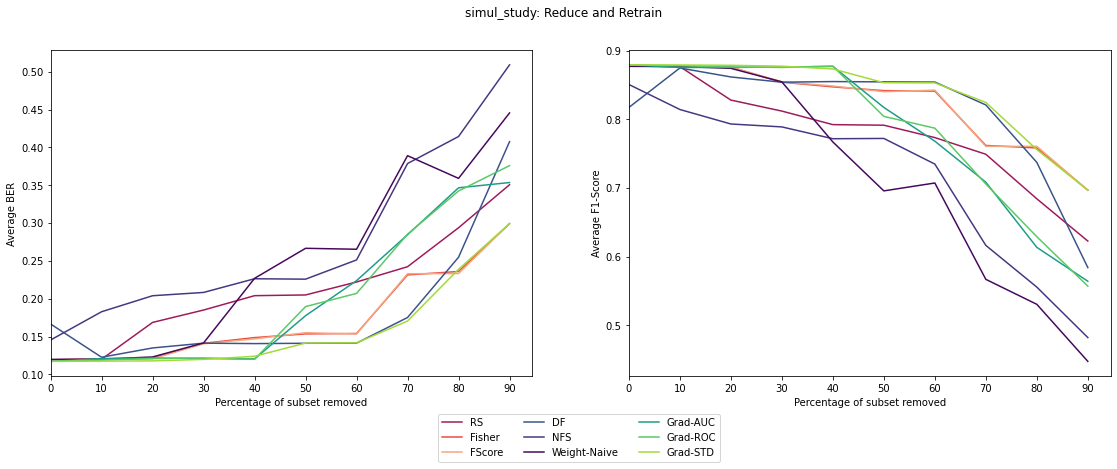

In [9]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
for i in ber_dictionary_average_plt.keys():
    plt.plot( np.flip(ber_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

plt.subplot(1,2,2)
for i in cr_dictionary_average_plt.keys():
    plt.plot( np.flip(cr_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.legend([j for i, j in name_set], ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.ylabel("Average F1-Score")
plt.xlabel("Percentage of subset removed")

plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
plt.suptitle("simul_study: Reduce and Retrain")
